In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:

# 利用快速排序算法找到数列中第k大的值
def findKth(s, k):
    return findKth_c(s, 0, len(s) - 1, k)

def findKth_c(s, low, high, k):
    m = partition(s, low, high)
    if m == len(s) - k:
        return s[m]
    elif m < len(s) - k:
        return findKth_c(s, m + 1, high, k)
    else:
        return findKth_c(s, low, m - 1, k)

def partition(s, low, high):
    pivot, j = s[low], low
    for i in range(low + 1, high + 1):
        if s[i] <= pivot:
            j += 1
            s[i], s[j] = s[j], s[i]
    s[j], s[low] = s[low], s[j]
    return j

In [10]:

# 构建多目标模板匹配类（优化颜色显示，解决BGR/RGB错位问题）
class temp_match_multi():
    def __init__(self, img, temp, k=50):
        # 先判断图像是否读取成功
        if img is None or temp is None:
            raise ValueError("图像读取失败，请检查文件路径是否正确或文件是否损坏")

        self.img_bgr = img  # 保留原始BGR格式图像（用于OpenCV处理）
        self.temp_bgr = temp  # 保留原始BGR格式模板（用于OpenCV处理）
        self.img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转换为RGB格式（用于Matplotlib显示）
        self.temp_rgb = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)  # 转换为RGB格式（用于Matplotlib显示）
        # 定义需要匹配的个数
        self.k = k

    def match(self):
        # 转换为灰度图（模板匹配需要灰度图像输入）
        temp_gray = cv2.cvtColor(self.temp_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.cvtColor(self.img_bgr, cv2.COLOR_BGR2GRAY)

        # 获取模板图像的宽和高（注意shape[::-1]转换维度顺序）
        w, h = temp_gray.shape[::-1]

        # 选择模板匹配方法（归一化相关系数匹配，抗干扰性较好）
        match_method = cv2.TM_CCORR_NORMED
        res = cv2.matchTemplate(img_gray, temp_gray, match_method)

        # 扁平化匹配结果，用于寻找第k大值作为阈值
        match_result_flat = list(np.array(res).flatten())

        # 寻找res中第k大的值作为匹配阈值
        threshold = findKth(match_result_flat, self.k + 1)
        print('设定的匹配阈值为：', threshold)

        # 筛选出所有大于等于阈值的匹配位置
        loc = np.where(res >= threshold)

        # 复制原始BGR图像进行绘制，避免修改原始图像数据
        img_draw_bgr = self.img_bgr.copy()

        # 遍历所有匹配位置，绘制白色矩形框标注目标
        for pt in zip(*loc[::-1]):
            cv2.rectangle(img_draw_bgr, pt, (pt[0] + w, pt[1] + h), (255, 255, 255), 1)

        # 转换绘制结果为RGB格式，确保Matplotlib颜色显示正常
        img_draw_rgb = cv2.cvtColor(img_draw_bgr, cv2.COLOR_BGR2RGB)

        # 显示匹配结果图像（无坐标轴，更整洁）
        plt.figure()
        plt.title('Multi Template Matching Result')
        plt.imshow(img_draw_rgb)
        plt.xticks([])
        plt.yticks([])
        plt.show()

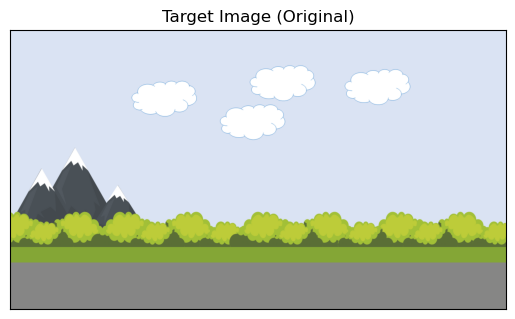

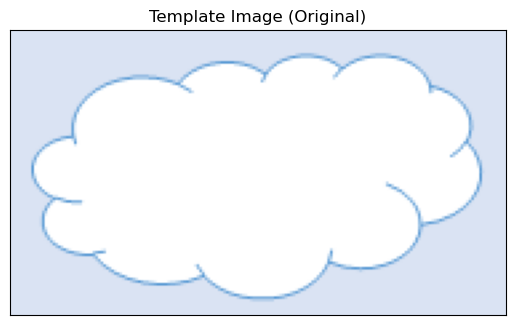

设定的匹配阈值为： 0.9979815


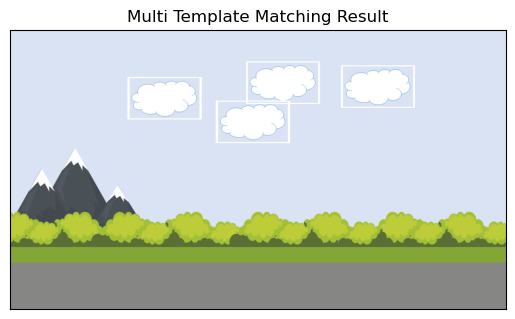

In [11]:

# 补全缺失的plot_image函数（用于显示原始目标图像和模板图像，颜色正常）
def plot_image(img_rgb, title):
    plt.figure()
    plt.title(title)
    plt.imshow(img_rgb)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# 主程序：读取图像、实例化类、执行匹配
if __name__ == "__main__":
    # 读取图像文件（请替换为你的实际图像路径，支持png/jpg等格式）
    # 注意：如果图像和代码在同一文件夹，直接写文件名即可；否则写绝对路径
    target_img = cv2.imread('img.png')
    template_img = cv2.imread('temp.png')

    # 实例化多目标模板匹配类（k=50表示匹配前50个高相似度目标）
    try:
        test_multi = temp_match_multi(target_img, template_img, k=50)

        # 显示原始目标图像和模板图像（颜色正常，带标题）
        plot_image(test_multi.img_rgb, 'Target Image (Original)')
        plot_image(test_multi.temp_rgb, 'Template Image (Original)')

        # 执行多目标模板匹配并显示结果
        test_multi.match()
    except ValueError as e:
        print("程序运行出错：", e)